In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [93]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [94]:
import DiadFit as pf
pf.__version__

'0.0.23'

In [95]:
# Add the path with your spectra in
meta_path=r'/Users/kyledayton/Downloads/09.27.22 LM6 G6 MI3/09.27.22 Text Files'
spectra_path=r'/Users/kyledayton/Downloads/09.27.22 LM6 G6 MI3/09.27.22 Spectra/CO2 Spectra'


In [96]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [97]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str='NE',
                            exclude_str_2='NO CO2')
Diad_files[0:50]

exclude type
.png


['LM6 G6 MI3 X2.txt', 'LM6 G6 MI3 X3.txt', 'LM6 G6 MI3.txt']

## Must be a way of filtering them on strength...

In [98]:
max_diad1=np.empty(len(Diad_files), dtype=float)
max_diad2=np.empty(len(Diad_files), dtype=float)
index_diad=np.empty(len(Diad_files), dtype=float)
i=0
for file in Diad_files:
    
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    
    Med_LHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
    Med_RHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)])
    Med_LHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1360)])
    Med_RHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1440)& (Diad[:, 0]<1470)])    
    #Med_central_back_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)]
    
    Diad_diad1=Diad[(Diad[:, 0]>1280)& (Diad[:, 0]<1295)]
    Diad_diad2=Diad[(Diad[:, 0]>1385)& (Diad[:, 0]<1395)]
    max_diad1[i]=np.max(Diad_diad1[:, 1])-  (Med_LHS_diad1+Med_RHS_diad1)/2       
    max_diad2[i]=np.max(Diad_diad2[:, 1]) - (Med_LHS_diad2+Med_RHS_diad2)/2 
    index_diad[i]=i
    i=i+1


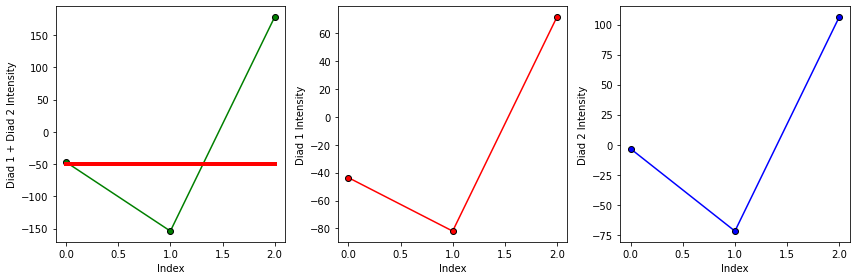

In [99]:
fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

combo_cutoff=-50

ax1.set_xlabel('Index')
ax2.set_xlabel('Index')
ax3.set_xlabel('Index')
ax3.set_ylabel('Diad 1 + Diad 2 Intensity')
ax2.set_ylabel('Diad 2 Intensity')
ax1.set_ylabel('Diad 1 Intensity')

ax1.plot(index_diad, max_diad1,  '-r')
ax1.plot(index_diad, max_diad1,  'ok', mfc='red')

ax2.plot(index_diad, max_diad2,  '-b')
ax2.plot(index_diad, max_diad2,  'ok', mfc='blue')

ax3.plot(index_diad, max_diad2+max_diad1,  '-g')
ax3.plot(index_diad, max_diad2+max_diad1,  'ok', mfc='green')
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_cutoff, combo_cutoff], '-r', lw=4)

## This gets dense diad files
Diad_Files_Dense=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)>combo_cutoff])
Diad_Files_Weak=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)<=combo_cutoff])

# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
fig.tight_layout()

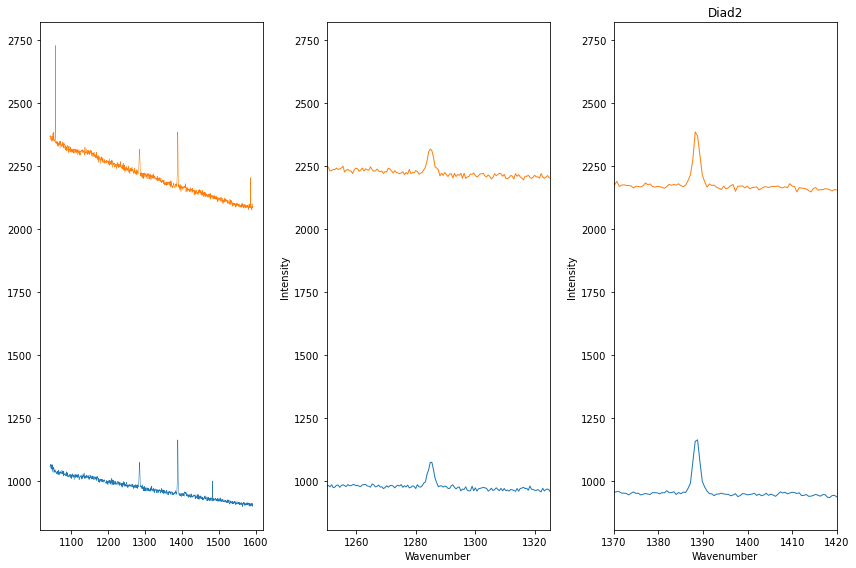

In [100]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Dense:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

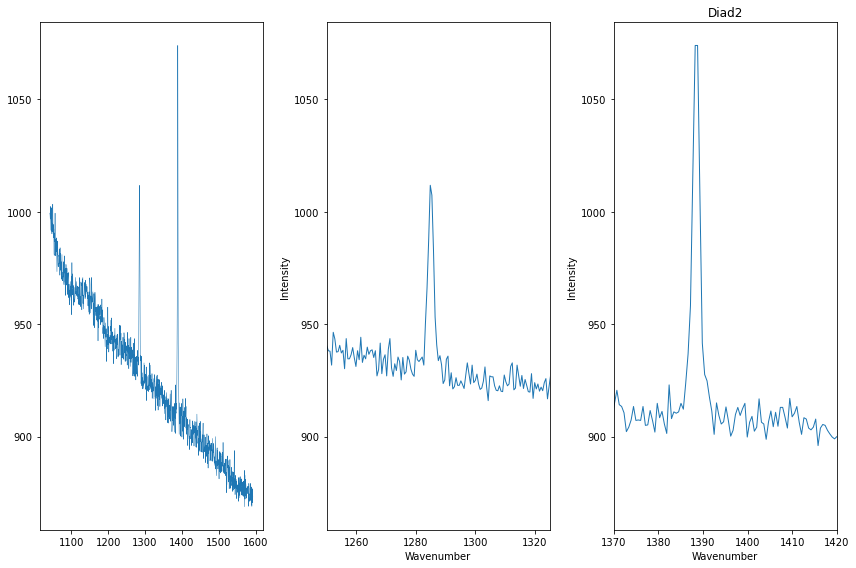

In [101]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

In [102]:
Diad_Files_Dense

['LM6 G6 MI3 X2.txt', 'LM6 G6 MI3.txt']

## strong Diads first
- This allows you to tweak parameters for your spectra and your instrument

In [103]:
filename=Diad_Files_Dense[0] #'23 MP2_2_MIB_12mW.txt'#  # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
#print(filename)

## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

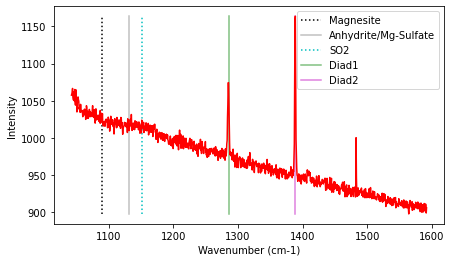

In [104]:
pf.plot_diad(path=spectra_path, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- First, look at the presets, you can edit them in carb_peak_config by typing the variable name, and a new value

In [105]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=False

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
Carb_Config=pf.carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330))
Carb_Config   

carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330), N_poly_carb_bck=1, amplitude=1000, cent_carbonate=1090, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True)

## This actually does the work fitting the carbonate peak

In [106]:
Carb_fit=pf.fit_carbonate_peak(config=Carb_Config, path=spectra_path, 
filename=filename, filetype=filetype,
fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [107]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

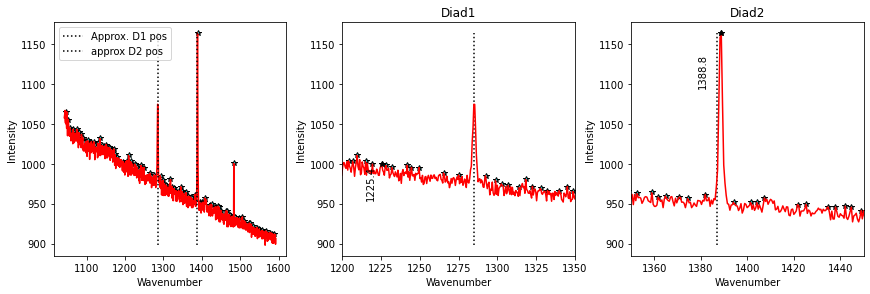

In [108]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=1
n_peaks_diad2=1

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [109]:
diad2_peaks

(1388.805794,)

## If you have no diads visible...
- change True to False, and it will just save the carbonate peak parameters

In [110]:
diads_present=True
pf.proceed_to_fit_diads(filename, Carb_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. 
- For very dense diads, you may need to fit a gaussian background, defined by peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000
- Otherwise, the background is fitted with a polynomial you can set the degree for (Default =1) based on background positoins defined by lower_bck, upper_bck...
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [111]:
diad1_fit_config=pf.diad1_fit_config(peak_pos_gauss=None,
                                     upper_bck_diad1=(1320, 1350),
                                     x_range_residual=10, x_range_baseline=10,
                                    HB_amplitude=50, diad_amplitude=1000)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1320, 1350), diad_amplitude=1000, HB_amplitude=50, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1
0,1285.023153,313.439688,0.630685,0.630685,4.150912


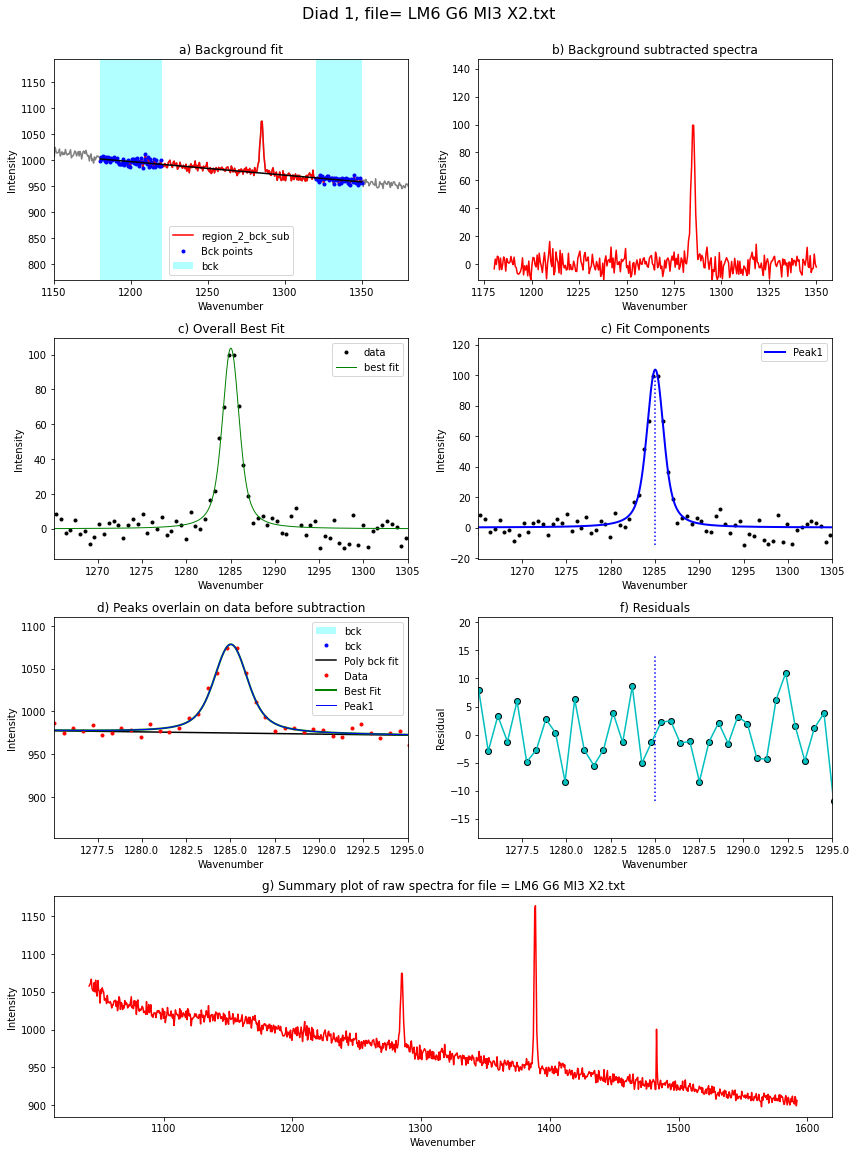

In [112]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 


# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad1_fit

## Fit diad 2

In [113]:
diad2_fit_config=pf.diad2_fit_config(peak_pos_gauss=None,
                                     x_range_residual=10, 
                                     lower_bck_diad2=(1300, 1340),
                                     x_range_baseline=10,
                                     HB_amplitude=100,
                                    diad_amplitude=1000)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1340), upper_bck_diad2=(1440, 1470), diad_amplitude=1000, HB_amplitude=100, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2
0,1388.556154,504.214307,0.455145,0.455145,3.918206


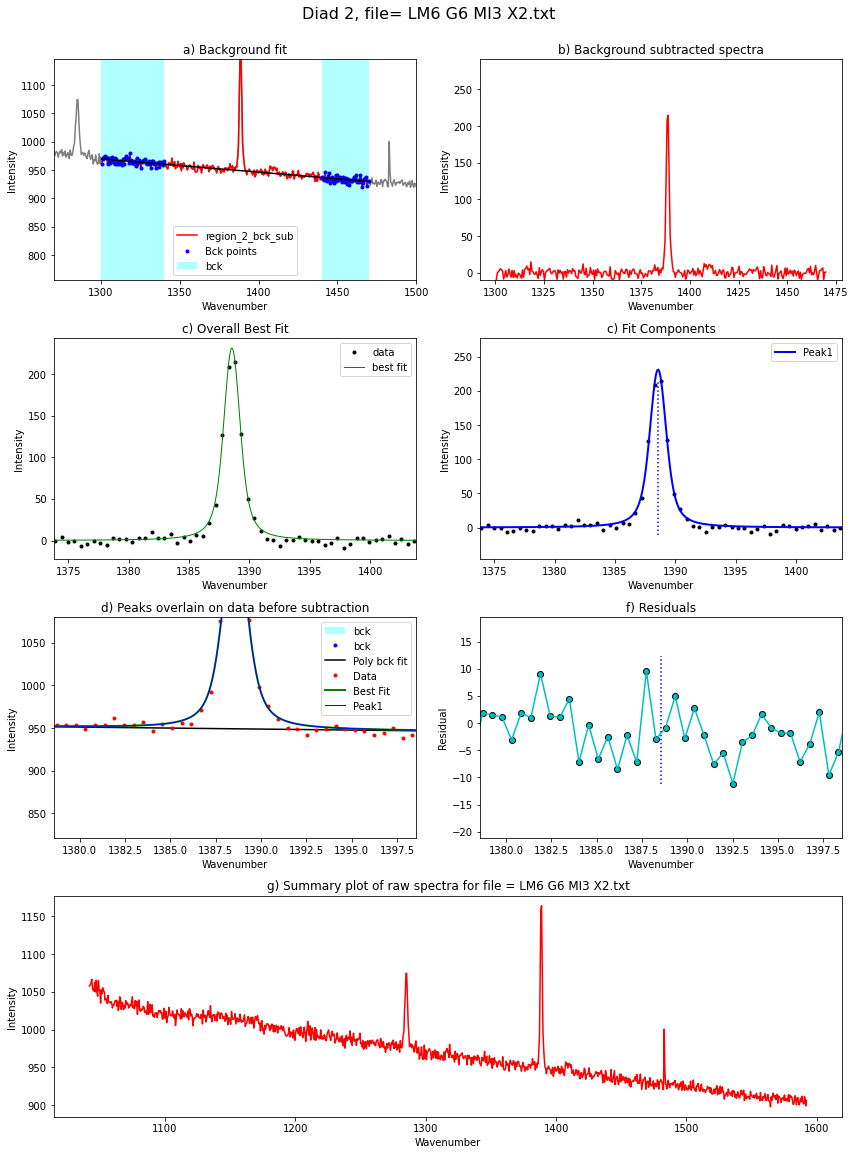

In [114]:
# Do you want to save the figure?
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)

Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "spectra_path" if to_csv=True)
- It also makes a new 

In [115]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=spectra_path,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,LM6 G6 MI3 X2,103.533001,1285.023153,313.439688,0.630685,0.630685,4.150912,1388.556154,504.214307,0.455145,0.455145,3.918206,NaN,0,NaN,0,NaN,0


In [116]:
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,LM6 G6 MI3 X2,103.533001,1285.023153,313.439688,0.630685,0.630685,4.150912,1388.556154,504.214307,0.455145,0.455145,3.918206,NaN,0,NaN,0,NaN,0


## You can also try looping if all your spectra are pretty similar

100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]


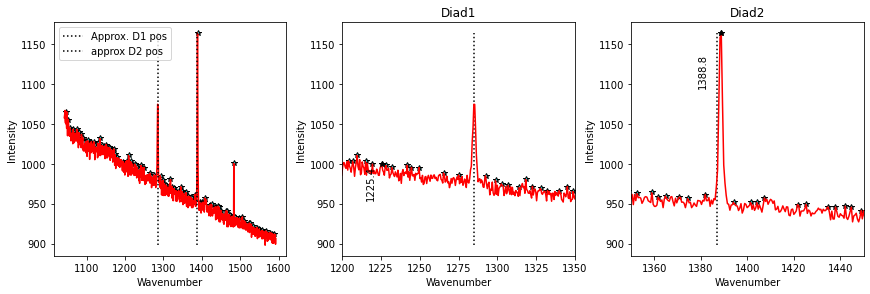

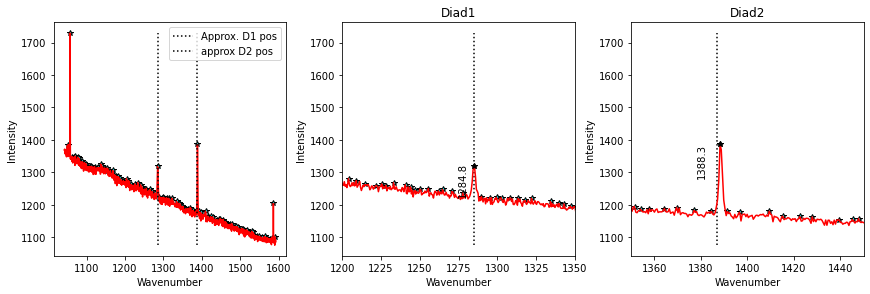

In [117]:
from tqdm import tqdm
plot_figure=True # Means doesnt have to make figures, lot faster. 
to_clipboard=False # Copies to clipboard
Diad_Files_Dense_i=Diad_Files_Dense
df_Dense = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Dense))):
    
    filename=Diad_Files_Dense[i]

    
    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=True)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype)
    
    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype)
    
    data=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,
                                
Diad2_fit=Diad2_fit)
 

    df_Dense = pd.concat([df_Dense, data], axis=0)


In [118]:
df_Dense

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,LM6 G6 MI3 X2,103.533001,1285.023153,313.439688,0.630685,0.630685,4.150912,1388.556154,504.214307,0.455145,0.455145,3.918206,NaN,0,NaN,0,NaN,0
0,LM6 G6 MI3,103.641962,1284.904837,285.721602,0.591815,0.591815,5.545541,1388.546799,450.771029,0.416550,0.416550,5.907096,NaN,0,NaN,0,NaN,0


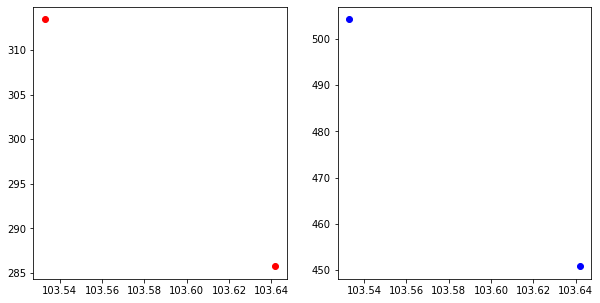

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Dense['Splitting'], df_Dense['Diad1_Area'], 'or')
ax2.plot(df_Dense['Splitting'], df_Dense['Diad2_Area'], 'ob')

df_not_too_Dense=df_Dense.loc[(df_Dense['Diad1_Area']>25) & (df_Dense['Diad2_Area']>30)]

## Extracting metadata for these diads

In [120]:
# Put the common string you can in all your Ne lines here
ID_str='.txt'
file_ext_meta='.txt' # Will only take files of this type 
exclude_str='NE' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
diad_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

diad_meta[0:5]


['LM6 G6 MI3 50X PHOTO.txt',
 'LM6 G6 MI3 50X TOP MI1 ABOVE MI3 SLIGHTLY  PHOTO.txt',
 'LM6 G6 MI3 BUBBLE PHOTO.txt',
 'LM6 G6 MI3 PHOTO.txt',
 'LM6 G6 MI3 X2.txt']

In [121]:
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=diad_meta, prefix=False,
                               trupower=True)

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 608.17it/s]

Done



/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/importing_data_files.py:594: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Df_2['index']=Time_Df_2.index


In [122]:
meta['filename']

6       LM6 G6 MI3.txt
4    LM6 G6 MI3 X2.txt
5    LM6 G6 MI3 X3.txt
Name: filename, dtype: object

## Stitching metadata and data together

In [123]:
meta['filename'][5]

'LM6 G6 MI3 X3.txt'

In [124]:
df_not_too_Dense['filename'][0]

0    LM6 G6 MI3 X2
0       LM6 G6 MI3
Name: filename, dtype: object

In [125]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=' ',
   file_type='.txt')

file_m

array(['LM6 G6 MI3', 'LM6 G6 MI3 X2', 'LM6 G6 MI3 X3'], dtype=object)

In [126]:
df_not_too_Dense['filename'].head()

0    LM6 G6 MI3 X2
0       LM6 G6 MI3
Name: filename, dtype: object

In [127]:
type(df_not_too_Dense['filename'])

pandas.core.series.Series

In [130]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df_not_too_Dense['filename'].reset_index(drop=True),
    prefix=False, str_prefix=' ',
   file_type='.txt')
file_s

array(['LM6 G6 MI3 X2', 'LM6 G6 MI3'], dtype=object)

In [131]:
# Combining them together
meta['name_for_matching']=file_m
df_not_too_Dense['name_for_matching']=file_s
df_combo=df_not_too_Dense.merge(meta, on='name_for_matching')

In [132]:
df_combo.head()

,filename_x,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,LM6 G6 MI3 X2,103.533001,1285.023153,313.439688,0.630685,0.630685,4.150912,1388.556154,504.214307,0.455145,...,"September 27, 2022\n",5.026,45.0,5.0,100.0,"['0h', '3m', '47s']",4:24:41 PM\n,59081.0,1325.0,4
1,LM6 G6 MI3,103.641962,1284.904837,285.721602,0.591815,0.591815,5.545541,1388.546799,450.771029,0.416550,...,"September 27, 2022\n",5.024,45.0,5.0,100.0,"['0h', '3m', '47s']",4:16:40 PM\n,58600.0,1325.0,6


## Now load in the model for doing the Ne fitting

In [133]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_09.27.22.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [134]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [135]:
density_df=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])
df_combo.insert(1, 'Density', density_df['Preferred D'])

In [136]:
df_FIs=df_combo.loc[df_combo['filename_x'].str.contains('FI')]

In [137]:
df_FIs

,filename_x,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction


In [138]:
df_FIs.to_excel('092722_highrho_part1_FIs.xlsx')

In [139]:
df_MIs=df_combo.loc[df_combo['filename_x'].str.contains('MI')]

In [140]:
df_MIs

,filename_x,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction
0,LM6 G6 MI3 X2,0.364586,103.622613,103.533001,1285.023153,313.439688,0.630685,0.630685,4.150912,1388.556154,...,5.026,45.0,5.0,100.0,"['0h', '3m', '47s']",4:24:41 PM\n,59081.0,1325.0,4,1.000866
1,LM6 G6 MI3,0.413345,103.729748,103.641962,1284.904837,285.721602,0.591815,0.591815,5.545541,1388.546799,...,5.024,45.0,5.0,100.0,"['0h', '3m', '47s']",4:16:40 PM\n,58600.0,1325.0,6,1.000847


In [1]:
df_MIs.to_excel('092722_highrho_part1_MIs.xlsx')

NameError: name 'df_MIs' is not defined

In [ ]:
FIs_AL=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3='ryan_lerner',
    g=9.81, output='df')

FIs_27=pf.convert_co2_density_depth_Coolprop(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3=2900,
    g=9.81, output='df')

In [2]:
plt.hist(FIs_AL['Depth (km)'], ec='r')
plt.hist(FIs_27['Depth (km)'], ec='k', fc=None)

NameError: name 'plt' is not defined

In [3]:
plt.hist(df_FIs['Density'], ec='k')
plt.xlabel('Density')

NameError: name 'plt' is not defined